# Machine Learning Group Regression Project
Rae Huang, Leo Pei, Scott Virshup, and Dane Hamlett | UC Davis MSBA '18

Assignment:
https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting#timeline

Code
* All members of the team must commit code on the project

Machine Learning
* Must use a Regression technique
* Must deploy model you created (not just calling out to Azure, AWS, or Google AI API).
* Must use a real data set (not fake data set, i.e. randomly generated numbers)

Juypter Notebook Documentation
* Must explain in detail accuracy of model
* Explain the tradeoffs you made
* Do exploratory data exploration

Bonus Opportunity (Up to 10% of Grade)

For groups that want to go above and beyond (truly exceptional effort) on the project you may receive bonus credit. Here are some ideas of what may be considered partial or full Bonus Credit.
* Build a Data Visualization Front End to Your API using Bokeh, Plotly, Shiny, or something similar.
* Build a true MVP you could pitch to a startup accelerator or Angel Investor in its current state.
* Incredible software engineering craftsmanship: monitoring, logging, load-testing, etc.
* Incredible Machine Learning craftsmanship and incorporation of class learnings and beyond.
* Exceptional showmanship in presentation
* You have an API deployed using Chalice/Flask or even R and the class can query it

<p id="toc"></p>
## Table of Contents

   - <a href="#one">Introduction</a>
   - <a href="#two">Import Libraries</a>
   - <a href="#three">Import Data</a>
   - <a href="#four">Explore Data</a>
   - <a href="#five">Feature Selection</a>
   - <a href="#six">Model Development</a>  
   - <a href="#seven">Model Validation</a>  
   - <a href="#eight">Recommendation</a>
   - <a href="#nine">References</a>

<hr style="width:50%;">
## <a id="one">Introduction</a>
<p><a href="#toc">Jump to top</a></p>

<hr style="width:50%;">
## <a id="two">Import Libraries</a>
<p><a href="#toc">Jump to top</a></p>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization specifications
color = sns.color_palette()
plt.style.use('ggplot')
%matplotlib inline

# Warning message supression
warnings.simplefilter("ignore")

<hr style="width:50%;">
## <a id="three">Import Data</a>
<p><a href="#toc">Jump to top</a></p>

In [11]:
# Import data

air_reserve = pd.read_csv("air_reserve.csv")
air_store_info = pd.read_csv("air_store_info.csv")
air_visit_data = pd.read_csv("air_visit_data.csv")
date_info = pd.read_csv("date_info.csv")
store_id_relation = pd.read_csv("store_id_relation.csv")
hpg_reserve = pd.read_csv("hpg_reserve.csv")
hpg_store_info = pd.read_csv("hpg_store_info.csv")

### Preview Data

In [3]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [5]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [6]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [14]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [13]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [12]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


<hr style="width:50%;">
## <a id="four">Explore Data</a>
<p><a href="#toc">Jump to top</a></p>

### Reservations

In [29]:
# Number of stores in the air system
air_reserve.air_store_id.nunique()

314

In [30]:
# Number of stores in the hpg system
hpg_reserve.hpg_store_id.nunique()

13325

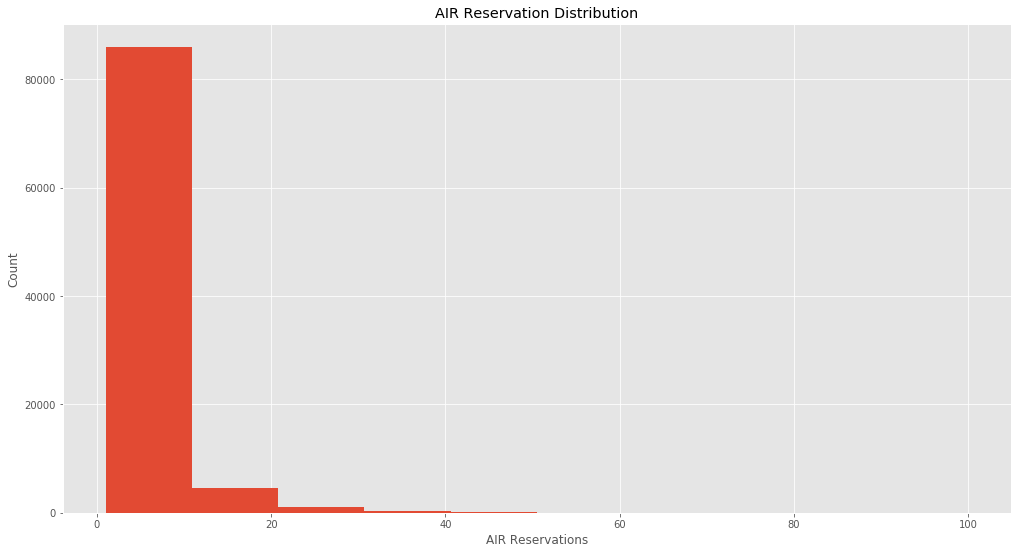

In [23]:
# Let's look at a distribution of the resevervations within the air system
air_disti_df = air_reserve[["reserve_visitors"]].copy()

# Create a subset to analyze and confirm the distribution of the data
pd.DataFrame.hist(air_disti_df, figsize = [17,9])
plt.title('AIR Reservation Distribution')
plt.xlabel('AIR Reservations')
plt.ylabel('Count')
plt.show()

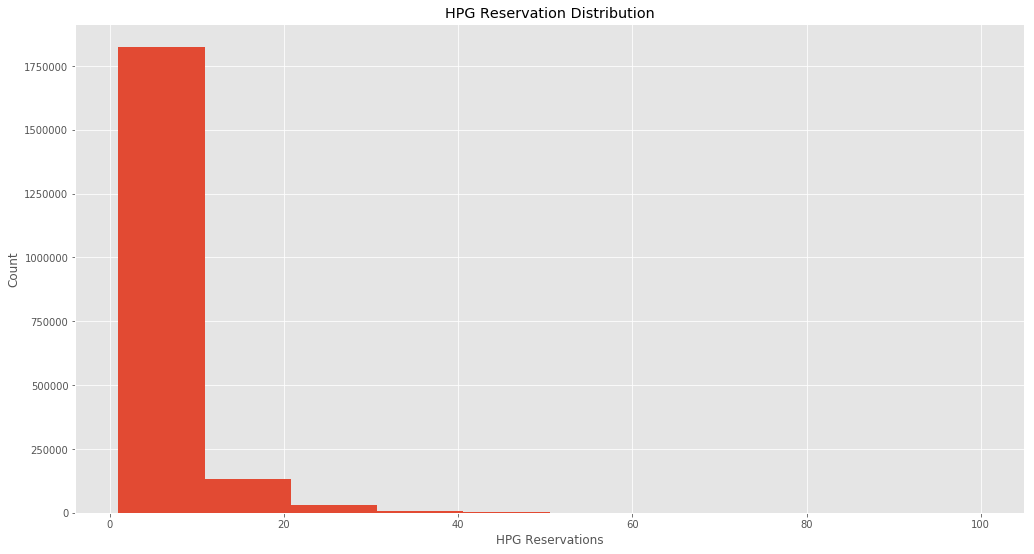

In [24]:
# Let's look at a distribution of the resevervations within the hpg system
hpg_disti_df = hpg_reserve[["reserve_visitors"]].copy()

# Create a subset to analyze and confirm the distribution of the data
pd.DataFrame.hist(hpg_disti_df, figsize = [17,9])
plt.title('HPG Reservation Distribution')
plt.xlabel('HPG Reservations')
plt.ylabel('Count')
plt.show()

In [18]:
# # Let's group our stores by visitors to see if we can find any trends
# visit_df = pd.DataFrame(air_reserve.groupby('air_store_id').reserve_visitors.nunique())
# visit_df = visit_df.sort_values(by='reserve_visitors', ascending=False)

# # Let's preview the results
# visit_df.head()

In [19]:
# Let's look at actual visitors
visit_df = air_reserve[["reserve_visitors"]].copy()
sns.tsplot(data=data)

NameError: name 'data' is not defined

In [ ]:
# df_results.loc[df_results['Driving_Distance'] <= 50]
# visit_df

In [ ]:
# Create a facet grid scatter plot to identify initial trends
cx = sns.FacetGrid(athletes, col='sport', col_wrap=5, size=3, aspect=1, hue='sport')
cx = cx.map(plt.scatter, 'weight', 'height')
cx.set_axis_labels('Weight (kg)', 'Height (meters)')
plt.show()

<hr style="width:50%;">
## <a id="five">Feature Selection</a>
<p><a href="#toc">Jump to top</a></p>

<hr style="width:50%;">
## <a id="six">Model Development</a>
<p><a href="#toc">Jump to top</a></p>

<hr style="width:50%;">
## <a id="seven">Model Validation</a>
<p><a href="#toc">Jump to top</a></p>

<hr style="width:50%;">
## <a id="eight">Recommendation</a>
<p><a href="#toc">Jump to top</a></p>

<hr style="width:50%;">
## <a id="nine">References</a>
<p><a href="#toc">Jump to top</a></p>

* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/